In [ ]:
install.packages("forecast")

In [ ]:
library(forecast)
options(repr.plot.width=16, repr.plot.height=9)


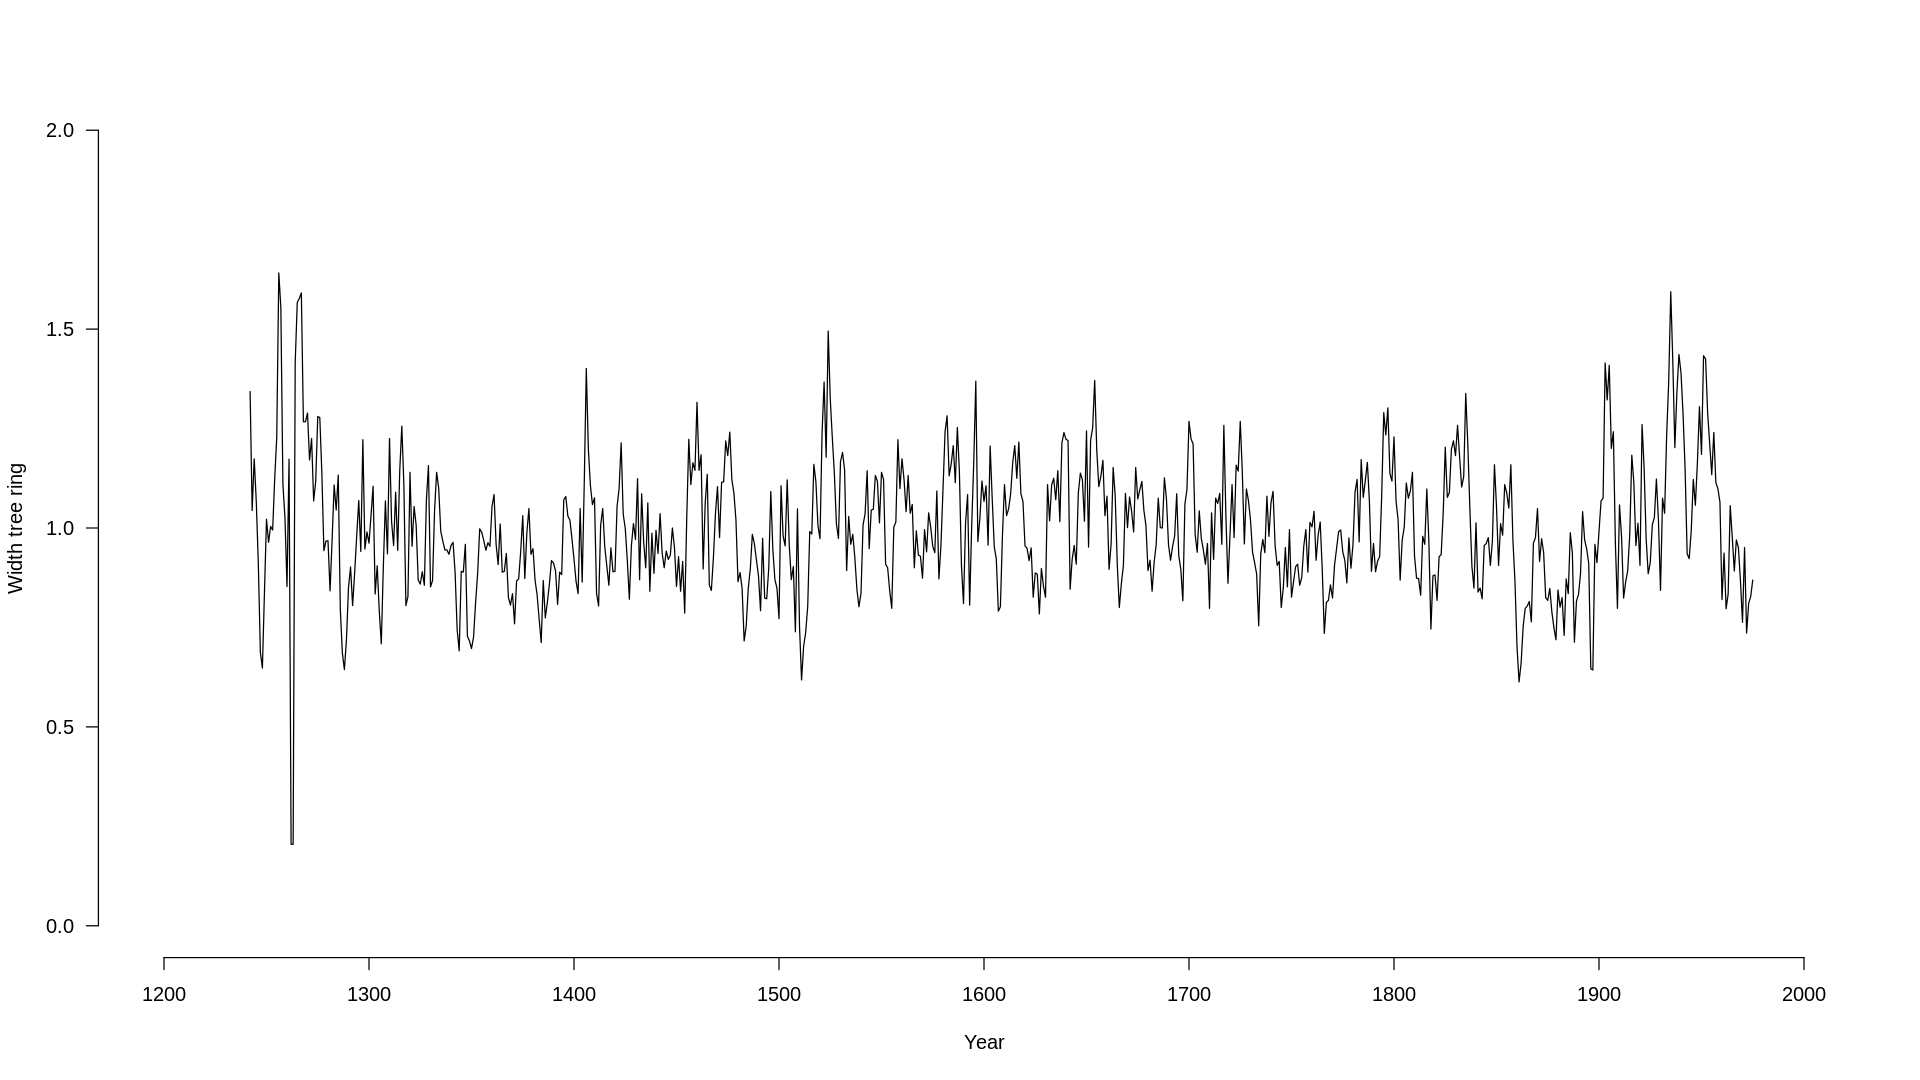

In [ ]:
############################
## Script Clase 12 - ARMA ##
############################

source("TS.diag.R")
source("summary.arima.R")
source("salida.arima.R")

Y <- readRDS("malleco.RDS")

## Grafico de Serie de Tiempo
par(bty = "n", las = 1, mfrow = c(1,1))
plot(Y, xlim = c(1200, 2000), ylab = "Width tree ring", xlab = "Year", xaxt = "n", ylim = c(0,2))
axis(1, seq(1200,2000,100))

[1] 0.85

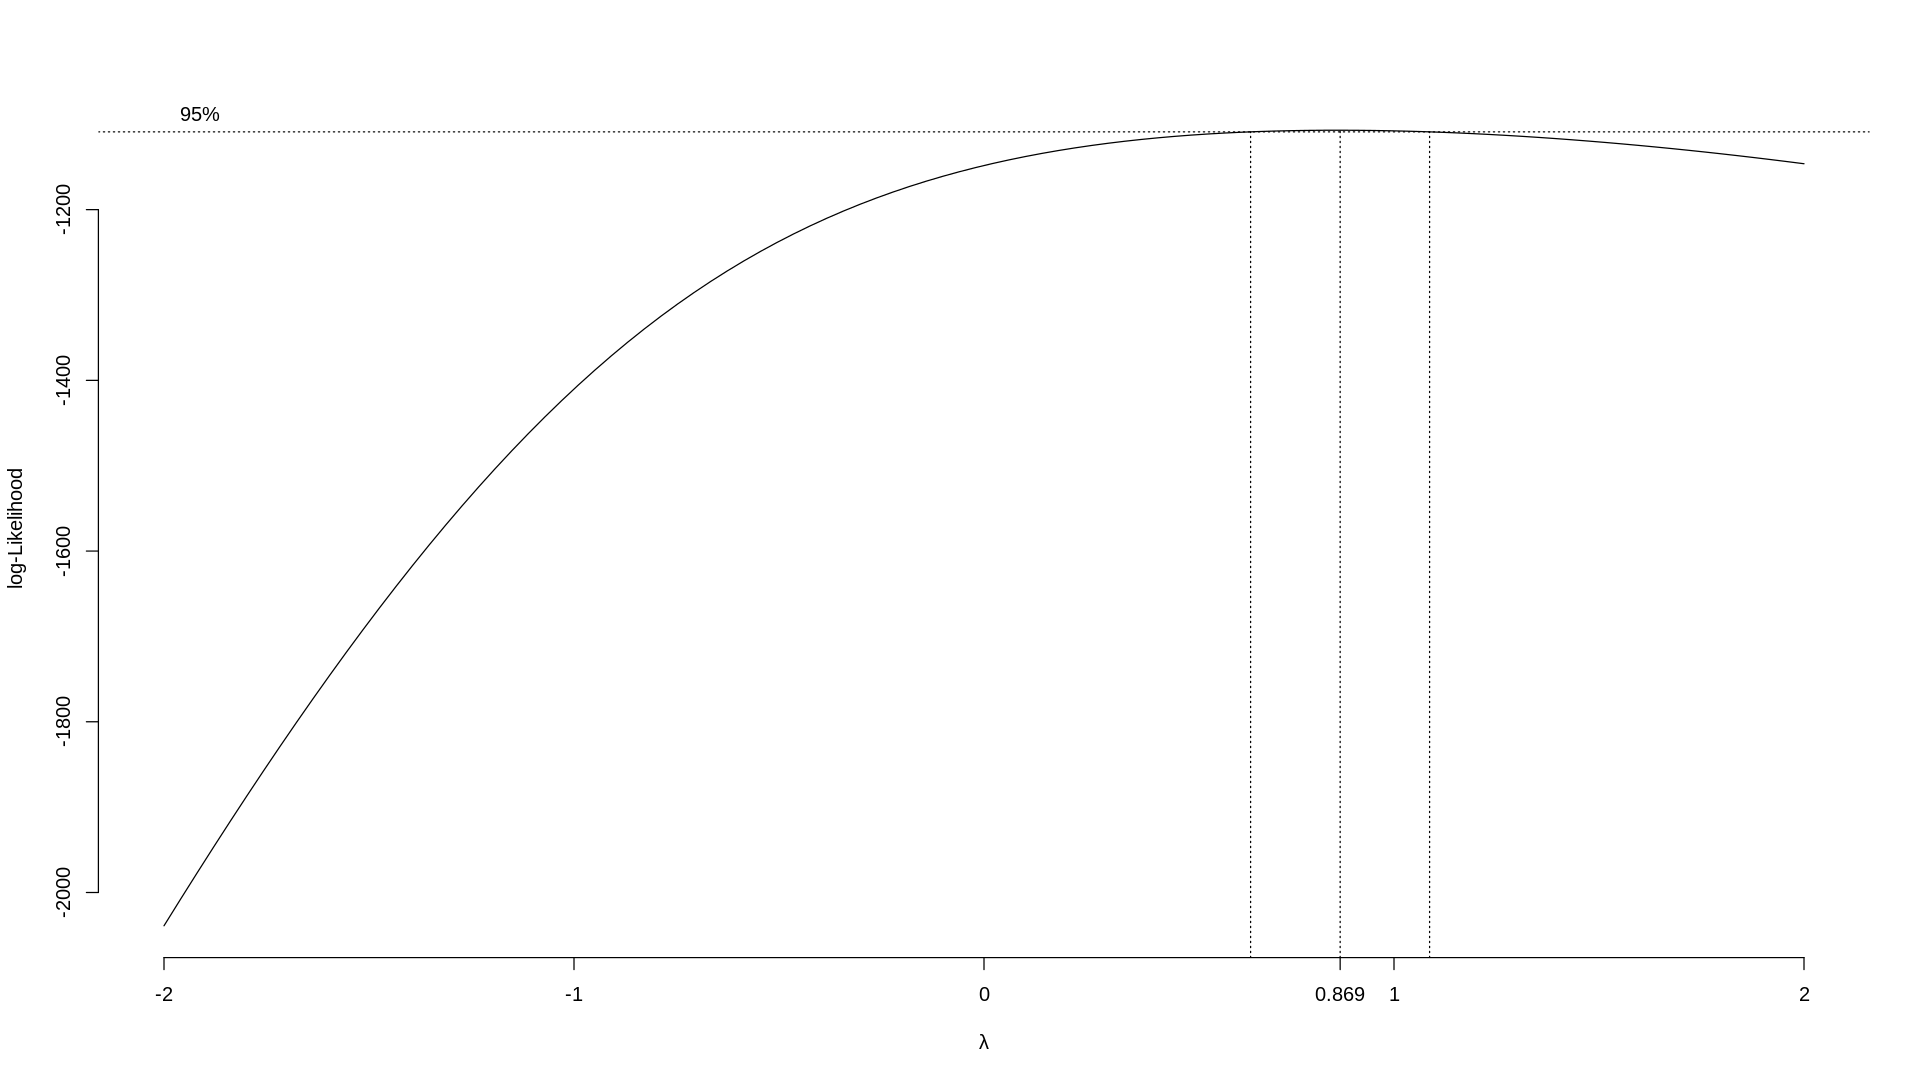

In [ ]:
## Transformación?
tiempo <- time(Y)
par(bty = "n")
aux <- MASS::boxcox(lm(Y ~ tiempo))
lambda <- aux$x[aux$y == max(aux$y)]
axis(1, at = lambda, labels = round(lambda,3))

## Alternativa
lambda <- forecast::BoxCox.lambda(Y, method = "loglik")
lambda

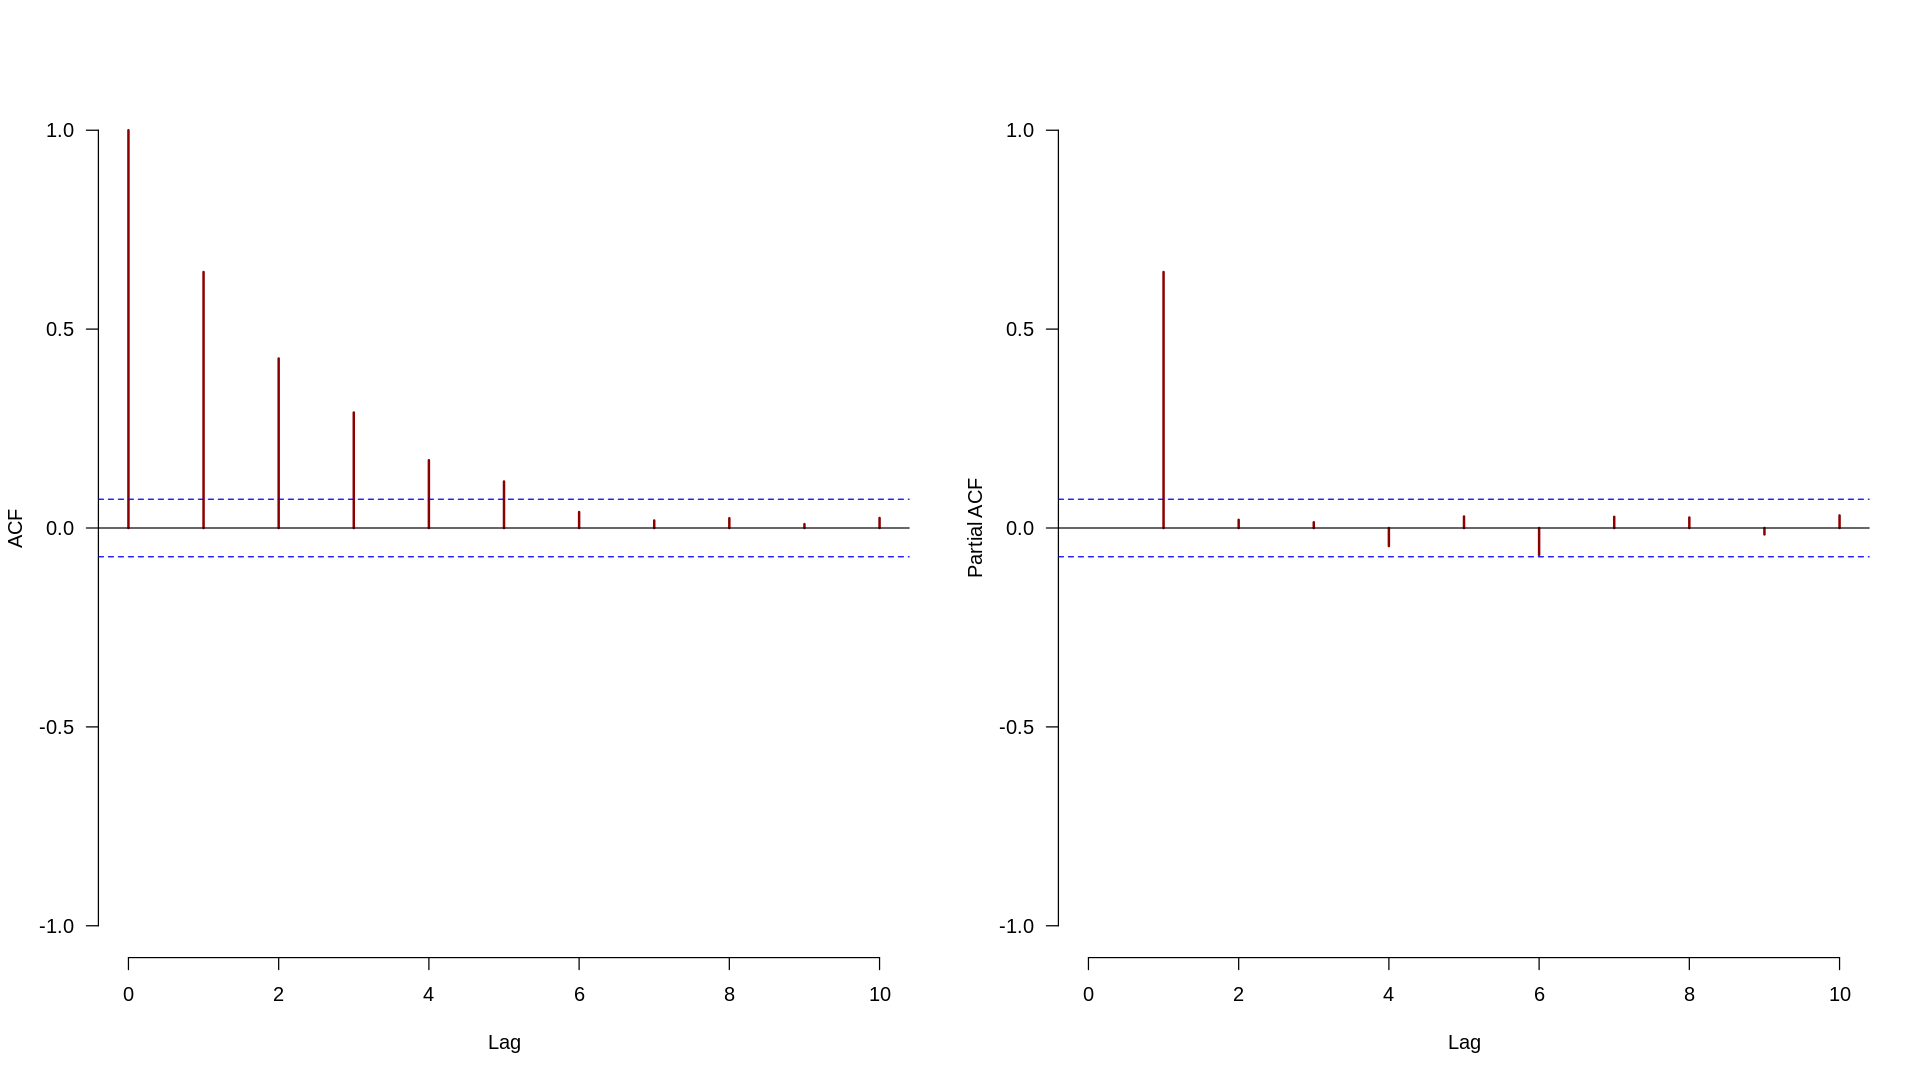

In [ ]:
## ARMA(p,q) --> ¿p,q?
## ACF  --> q
## PACF --> p
lag.max <- 10
par(bty = "n", las = 1, mfrow = c(1,2))
acf(Y, lag.max = lag.max, xlim = c(0,lag.max), ylim = c(-1,+1), main = "", lwd = 2, col = "darkred")
pacf(Y, lag.max = lag.max, xlim = c(0,lag.max), ylim = c(-1,+1), main = "", lwd = 2, col = "darkred")


Series: Y 
ARIMA(1,0,5) with non-zero mean 

Coefficients:
         ar1     ma1     ma2     ma3     ma4     ma5    mean
      0.3092  0.3311  0.2152  0.1823  0.0751  0.1104  0.9984
s.e.  0.2476  0.2461  0.1611  0.1018  0.0748  0.0466  0.0128

sigma^2 = 0.01576:  log likelihood = 484.96
AIC=-953.92   AICc=-953.72   BIC=-917.13

Training set error measures:
                        ME      RMSE        MAE      MPE    MAPE      MASE
Training set -0.0004223305 0.1249237 0.09342991 -2.04879 10.0573 0.9113233
                     ACF1
Training set -0.004172775
 
  
  Adjusted R-squared
           0.422327
 
           Estimate Std. Error z value Pr(>|z|)
ar1         0.3092     0.2476  1.2491   0.2116
ma1         0.3311     0.2461  1.3453   0.1785
ma2         0.2152     0.1611  1.3362   0.1815
ma3         0.1823     0.1018  1.7902   0.0734
ma4         0.0751     0.0748  1.0050   0.3149
ma5         0.1104     0.0466  2.3713   0.0177
intercept   0.9984     0.0128 78.3014   0.0000

 Residuals: 
 

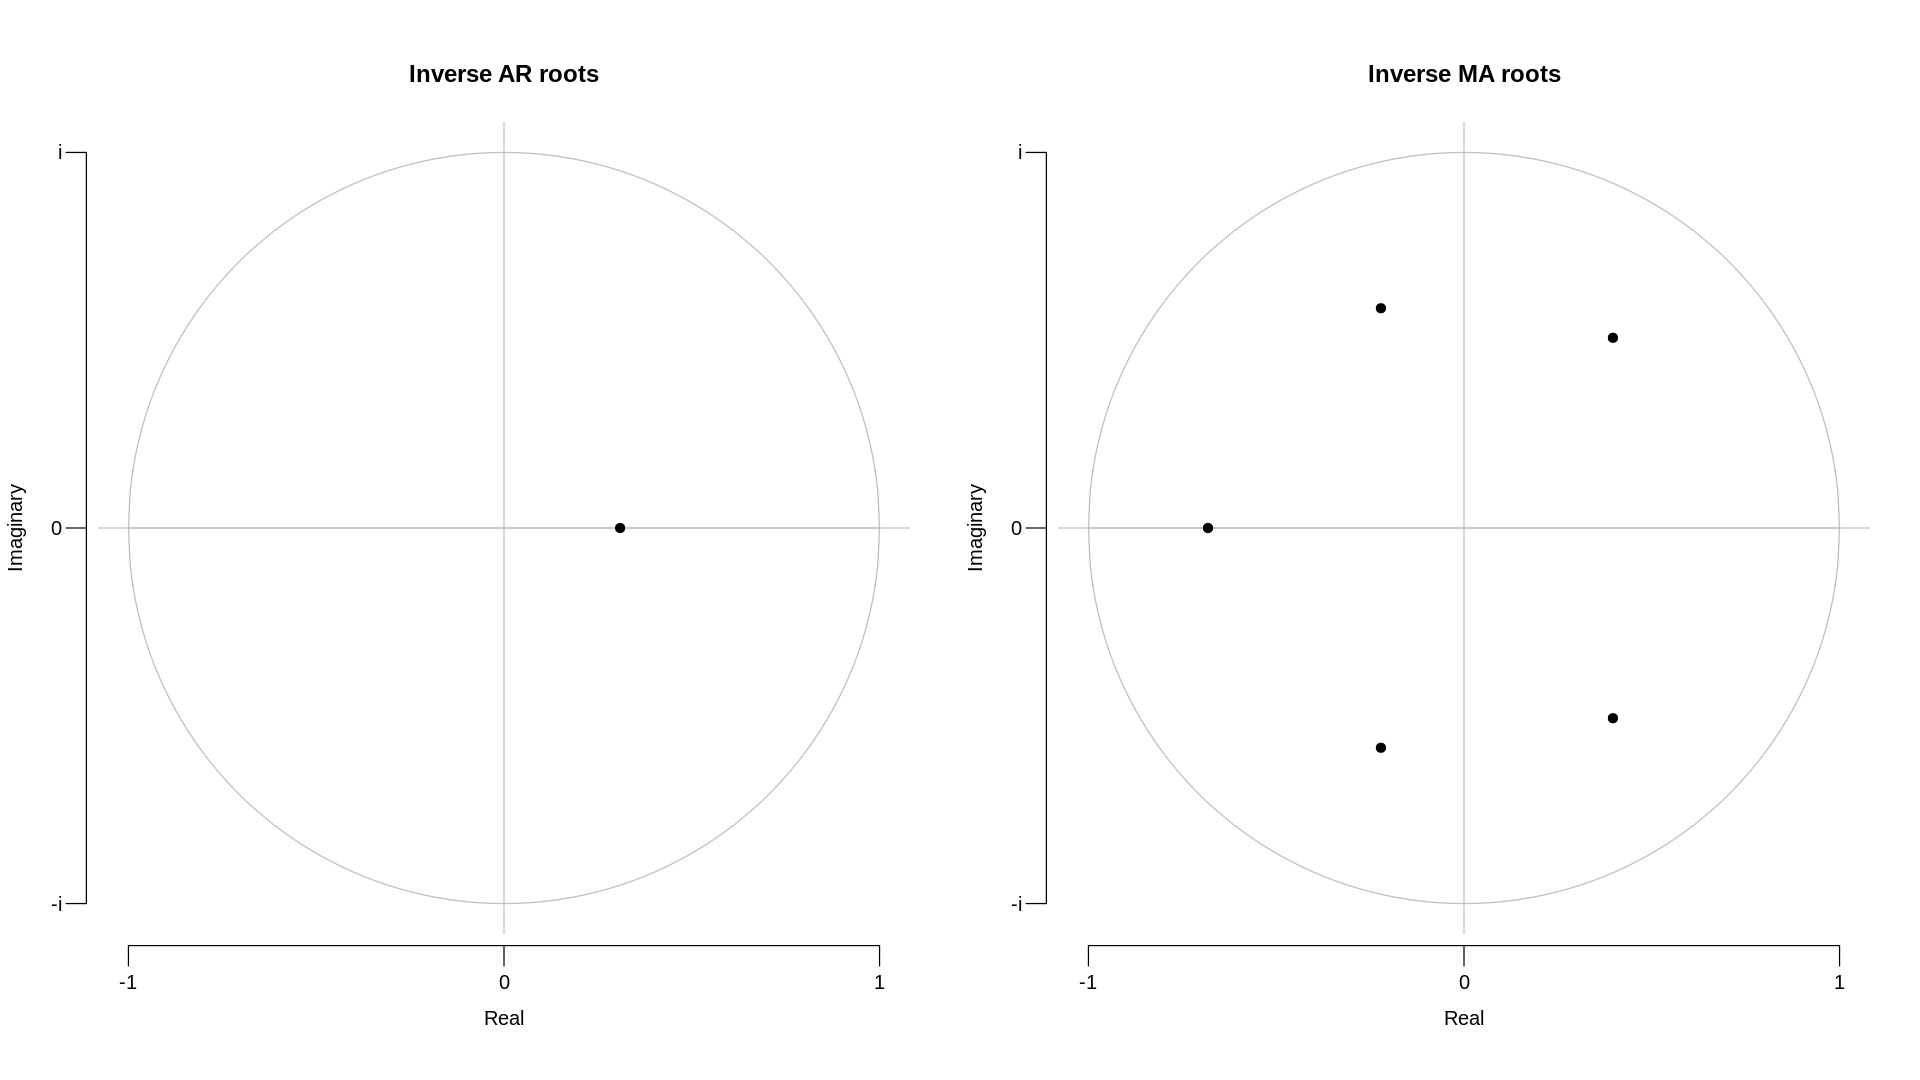

In [ ]:
## Estimación
model <- forecast::Arima(Y, order = c(1,0,5), lambda = NULL)
salida.arima(Y, model)

par(bty = "n", las = 1, mfrow = c(1,1))
plot(model)


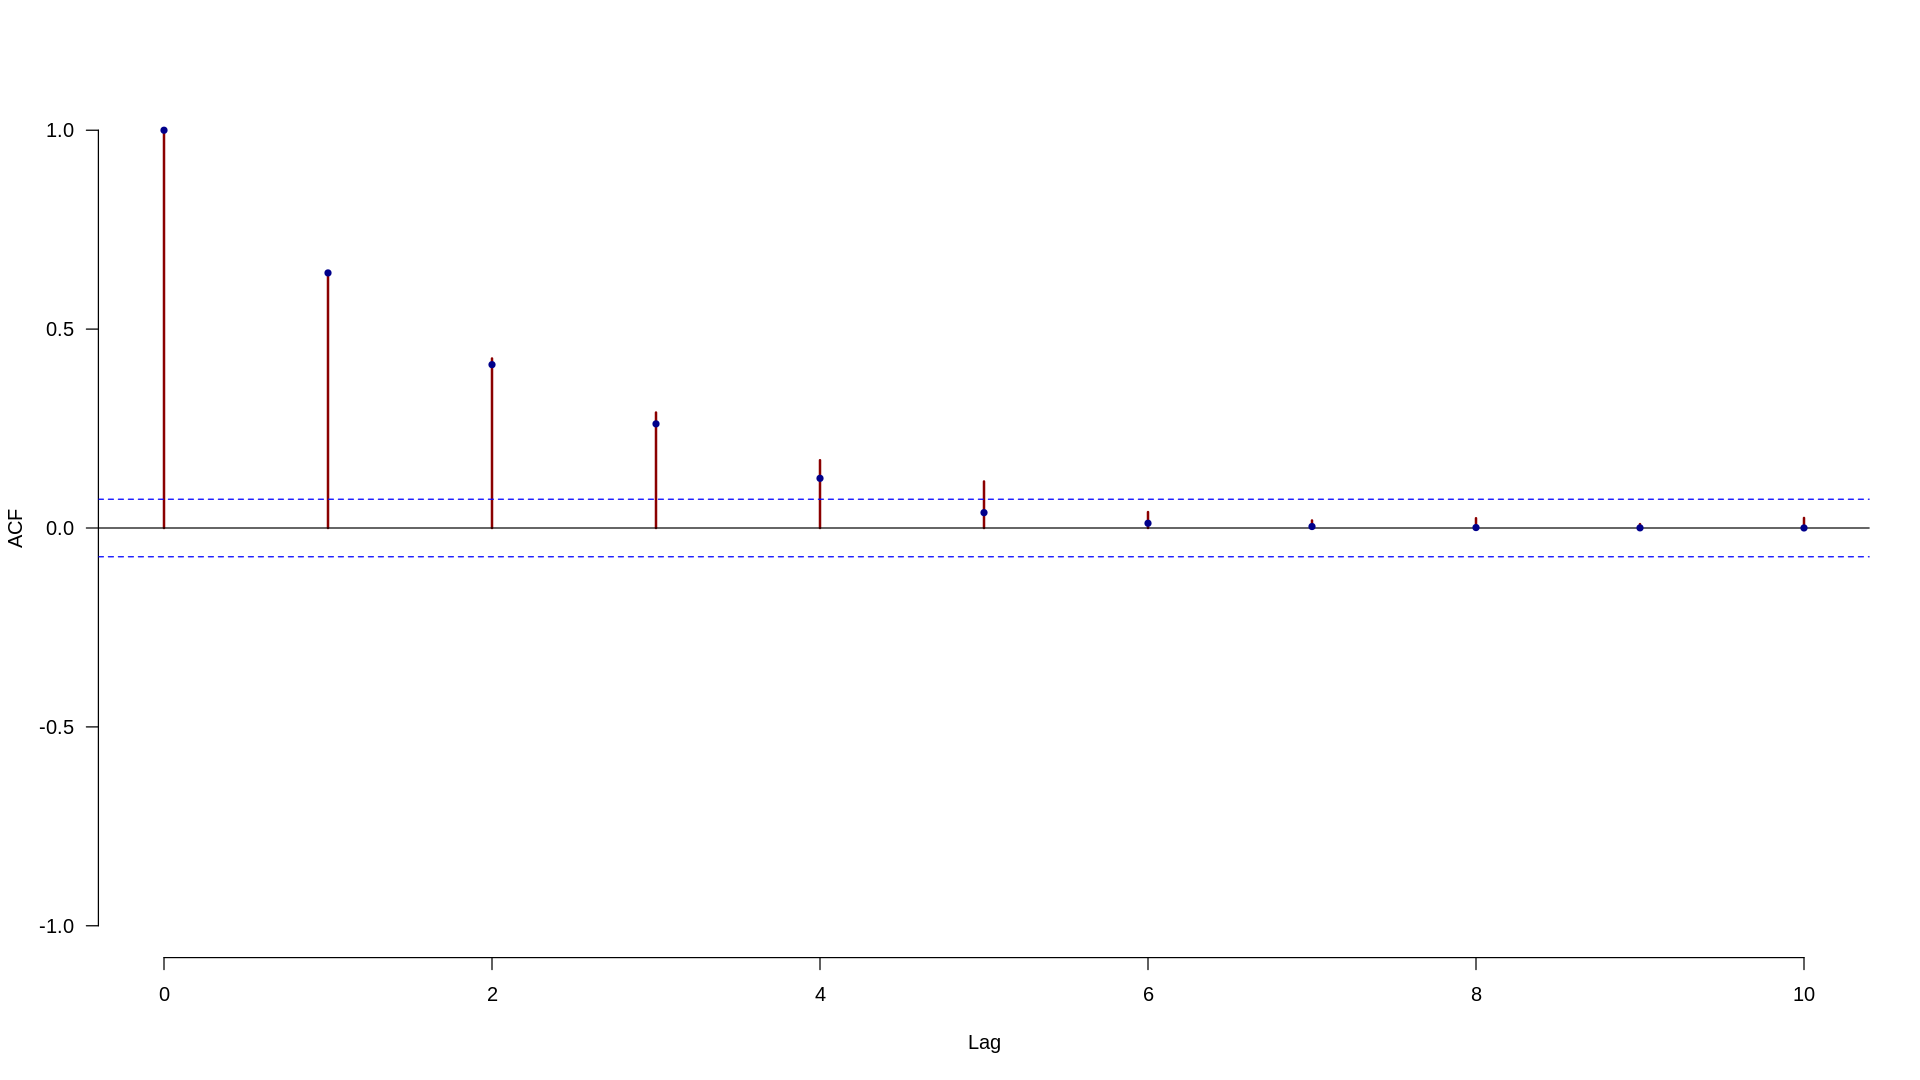

In [ ]:
ar <- model$coef[1]
ma <- model$coef[2:5]
par(bty = "n", las = 1, mfrow = c(1,1))
acf(Y, lag.max = lag.max, xlim = c(0,lag.max), ylim = c(-1,+1), main = "", lwd = 2, col = "darkred")
ACF <- ARMAacf(ar = ar, ma = ma, lag.max = lag.max)
lines(ACF ~ c(0:lag.max), type = "p", pch = 20, col = "darkblue")


In [ ]:

model <- forecast::auto.arima(Y, max.p = 1, max.q = 5)
salida.arima(Y, model)



Series: Y 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1    mean
      0.6470  0.9982
s.e.  0.0282  0.0131

sigma^2 = 0.01579:  log likelihood = 481.62
AIC=-957.25   AICc=-957.21   BIC=-943.45

Training set error measures:
                        ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.0004077457 0.1254974 0.0939224 -2.082895 10.13174 0.9161271
                    ACF1
Training set -0.01545464
 
  
  Adjusted R-squared
          0.4170085
 
           Estimate Std. Error z value Pr(>|z|)
ar1         0.6470     0.0282 22.9342        0
intercept   0.9982     0.0131 76.2528        0

 Residuals: 
         Kolmogorov-Smirnov test Breusch-Pagan test
p-value              0.04660558        0.004948452


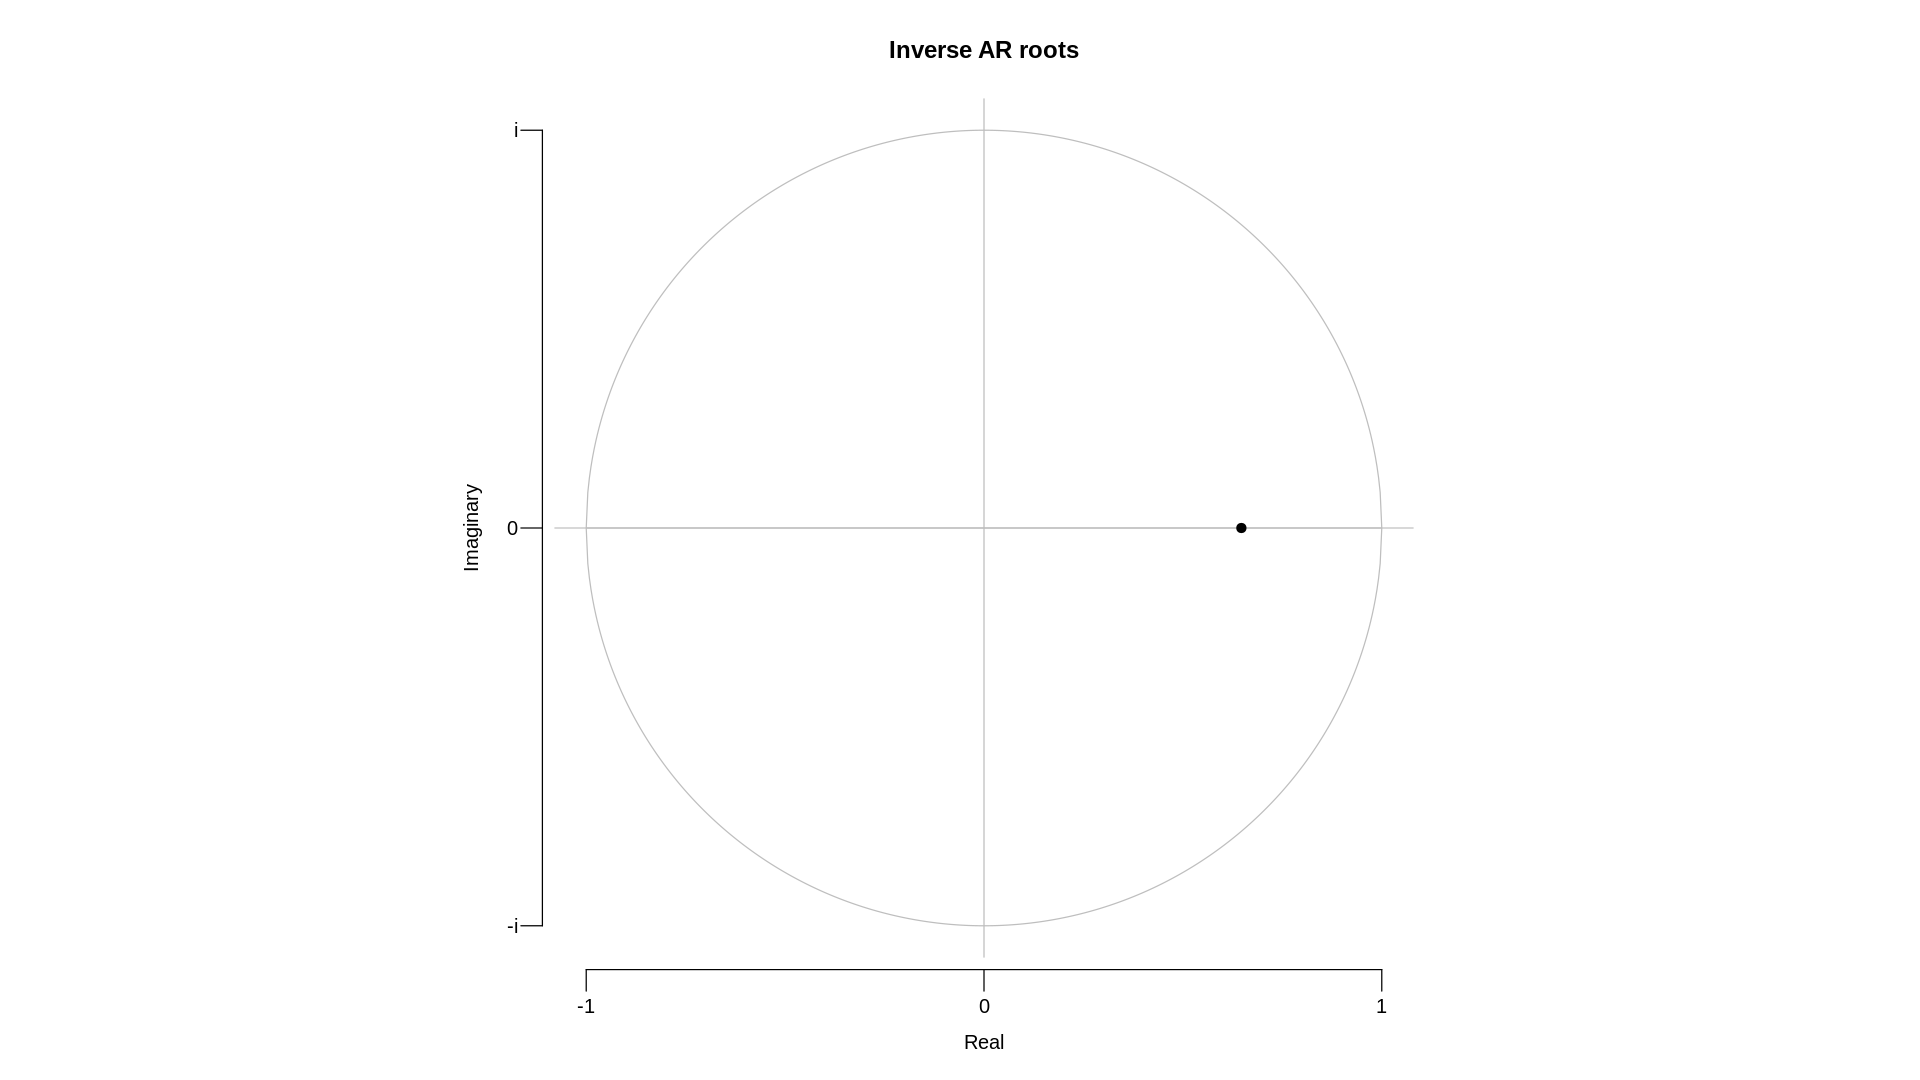

In [ ]:
par(bty = "n", las = 1, mfrow = c(1,1))
plot(model)

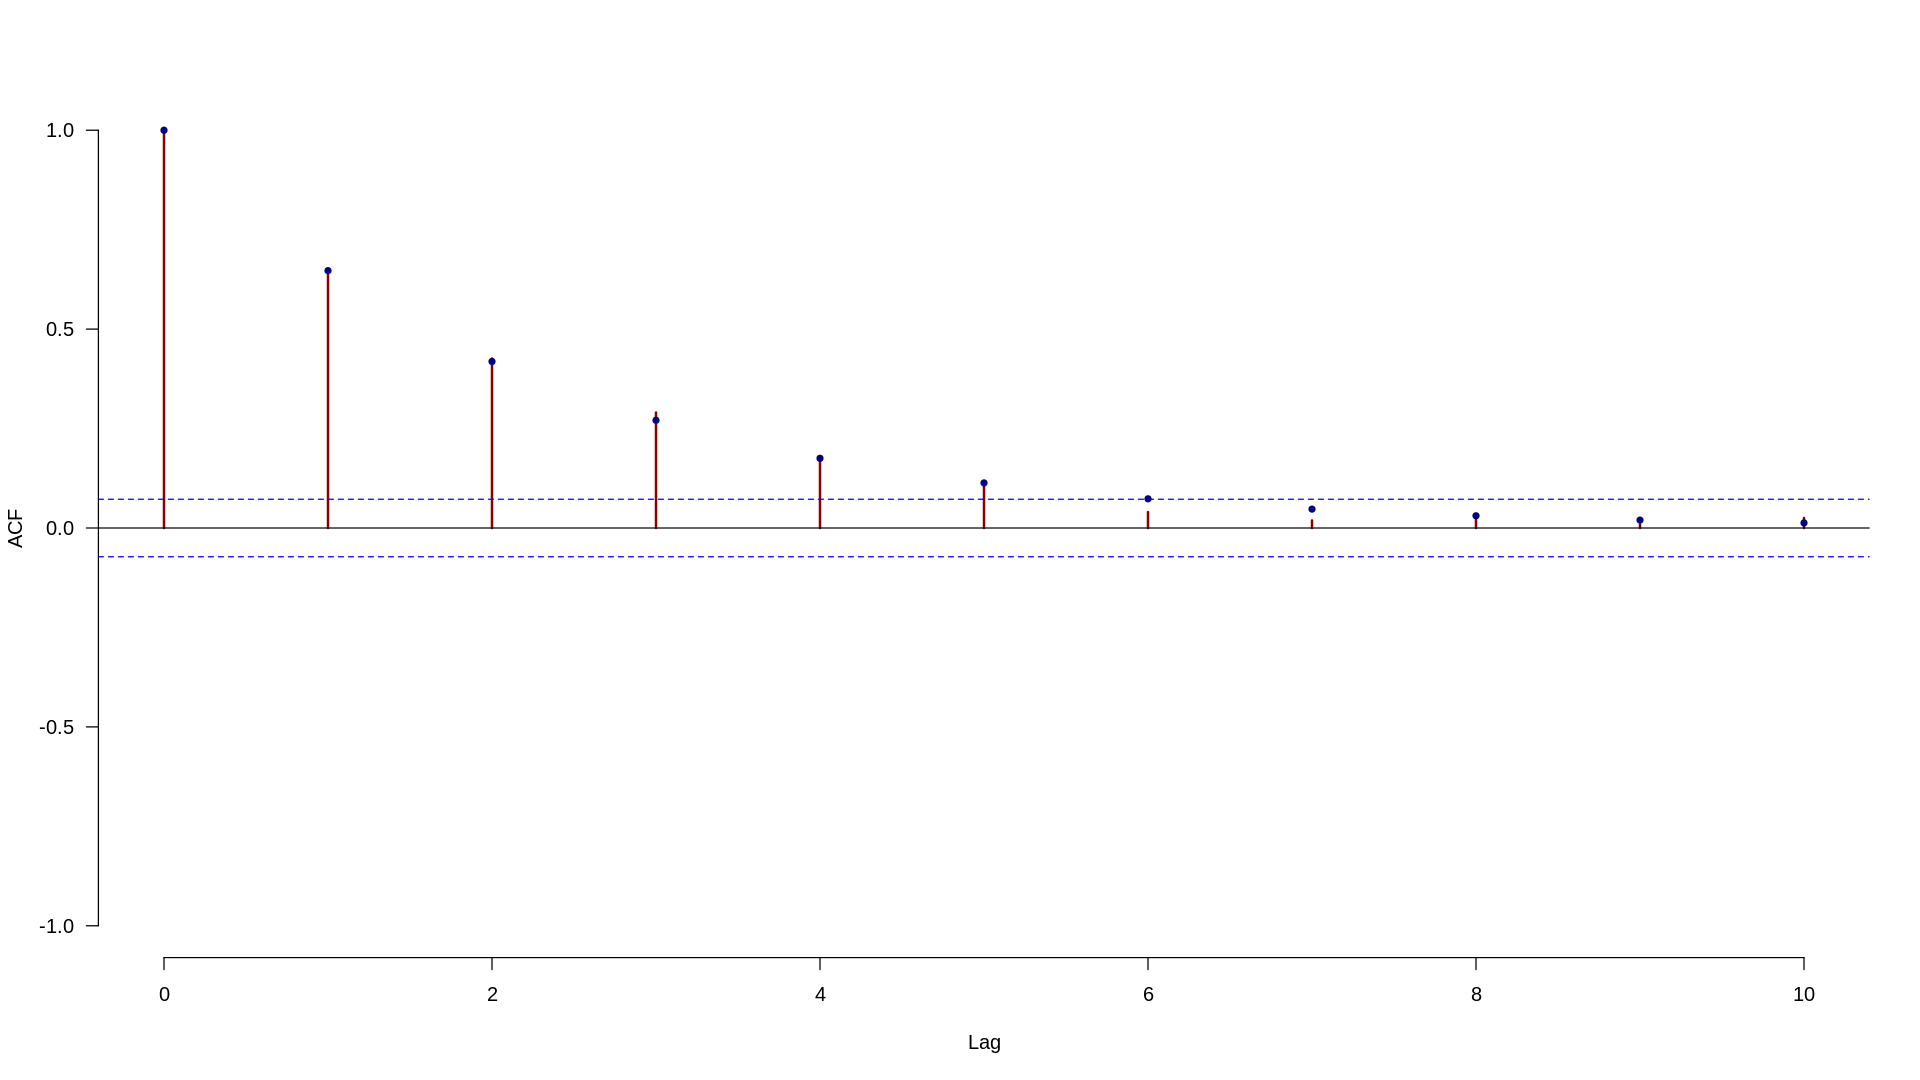

In [ ]:
ar <- model$coef[1]
ma <- NULL
par(bty = "n", las = 1, mfrow = c(1,1))
acf(Y, lag.max = lag.max, xlim = c(0,lag.max), ylim = c(-1,+1), main = "", lwd = 2, col = "darkred")
ACF <- ARMAacf(ar = ar, ma = ma, lag.max = lag.max)
lines(ACF ~ c(0:lag.max), type = "p", pch = 20, col = "darkblue")


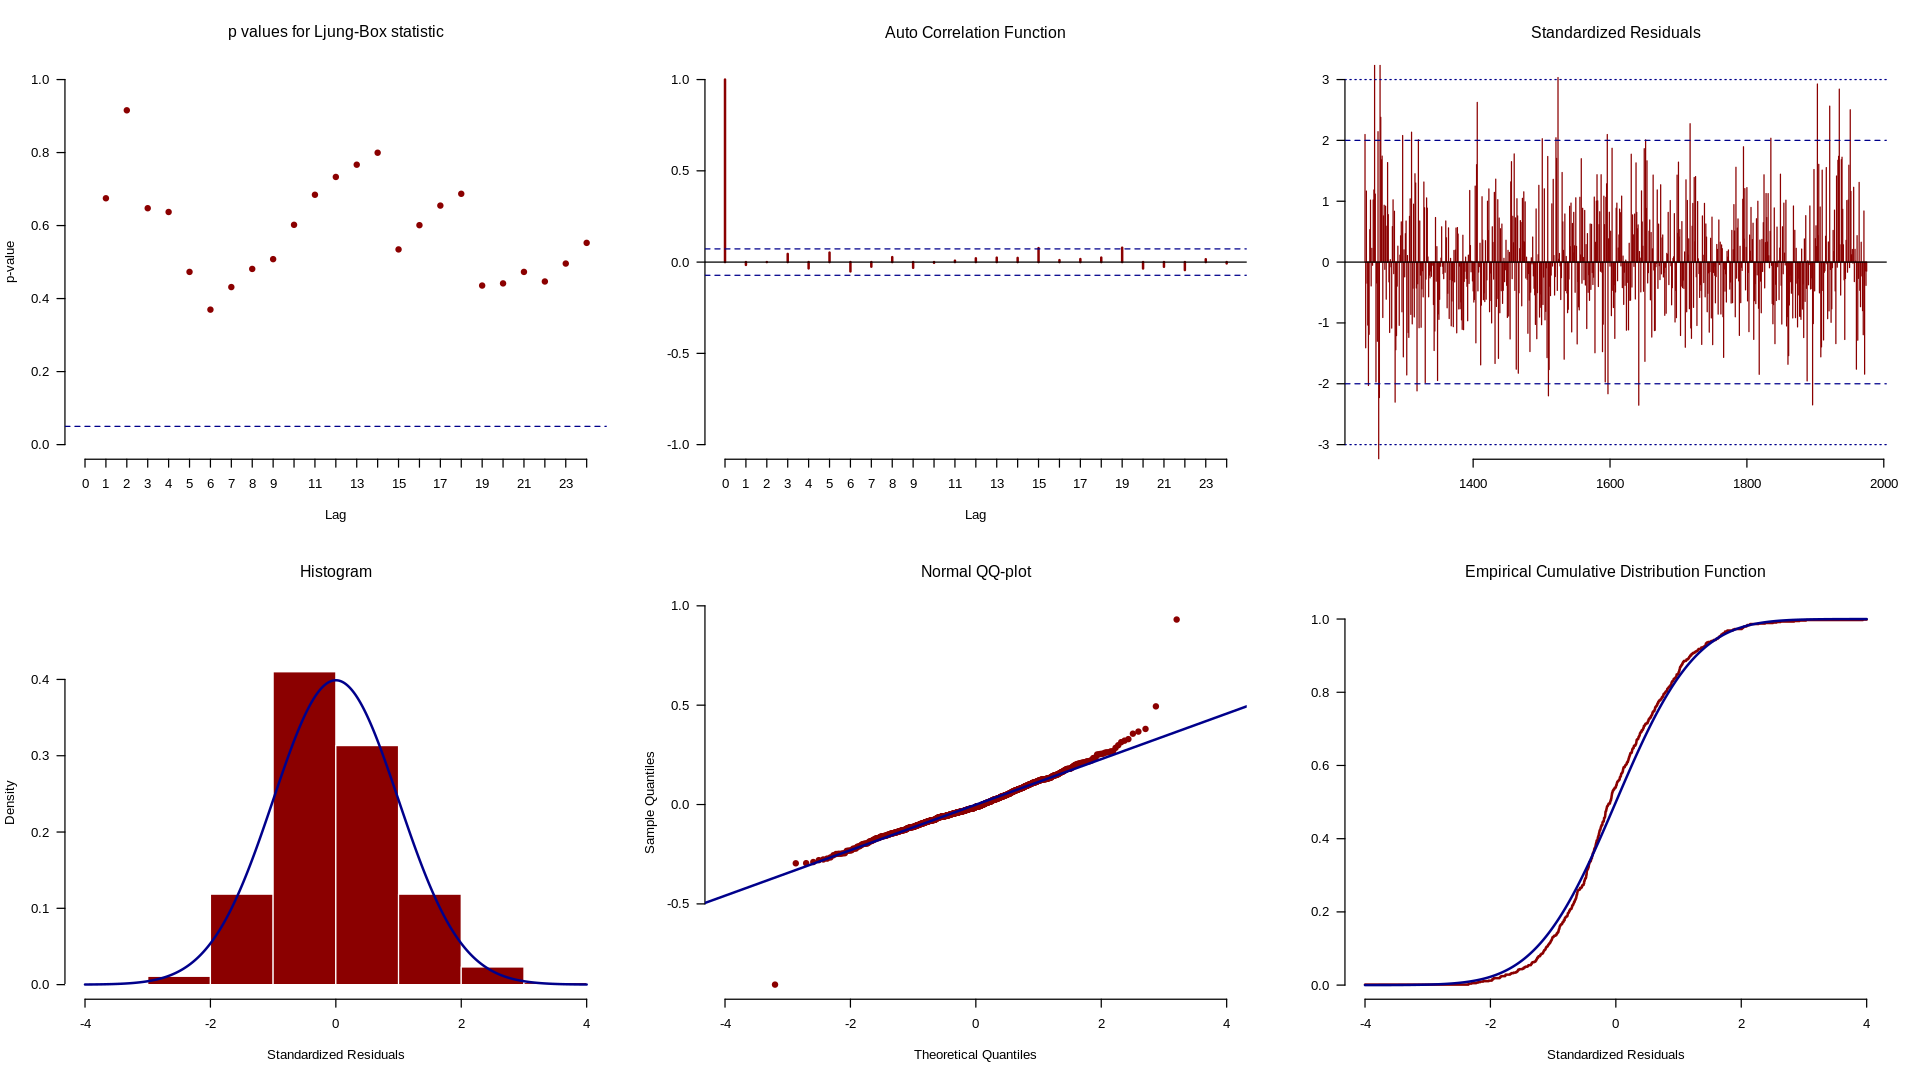

In [ ]:
## Dianostico de Residuos
TS.diag(model$res, col = "darkred", border = "darkblue")


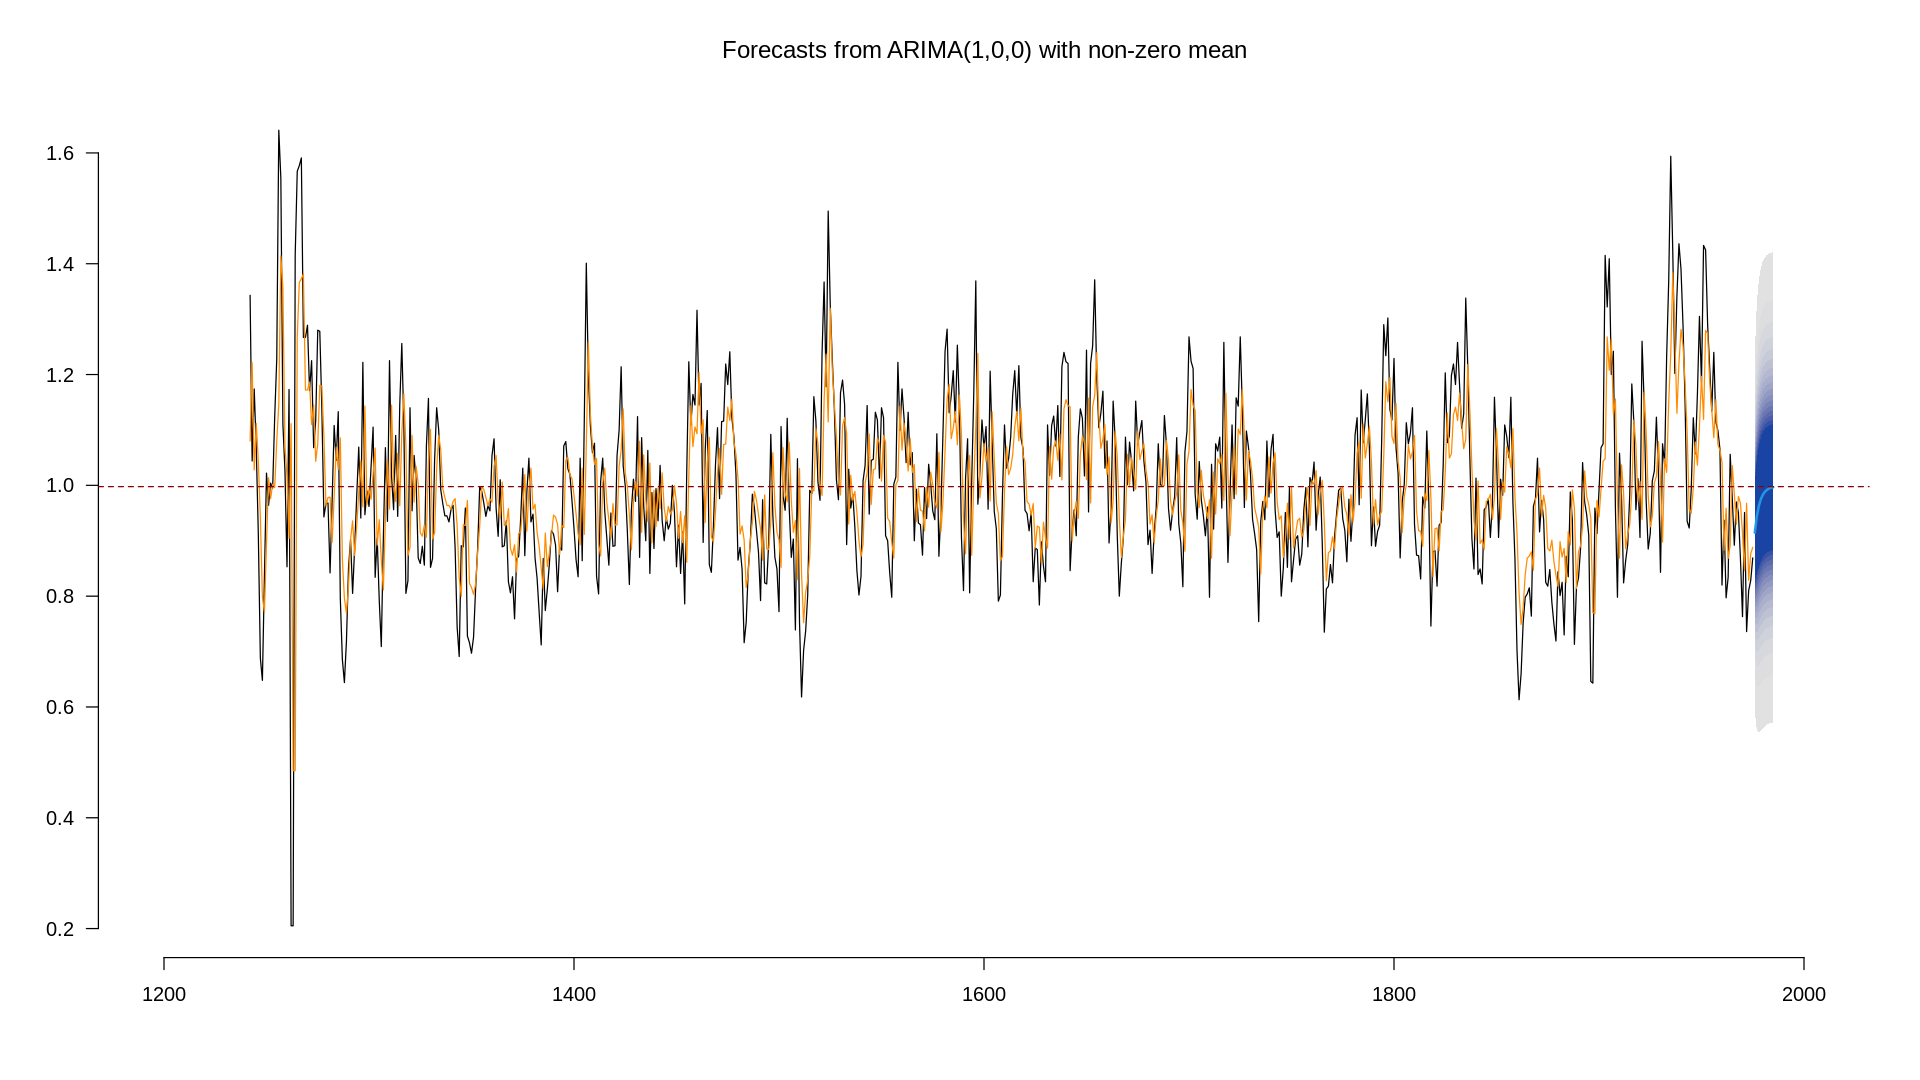

In [ ]:

## Predicción
pred <- forecast::forecast(model, h = 10, fan = T)
par(bty = "n", las = 1, mfrow = c(1,1), font.main = 1)
plot(pred, xlim = c(1200, 2000))
lines(pred$fitted, col = "darkorange")
abline(h = mean(Y), col = "darkred", lty = 2)



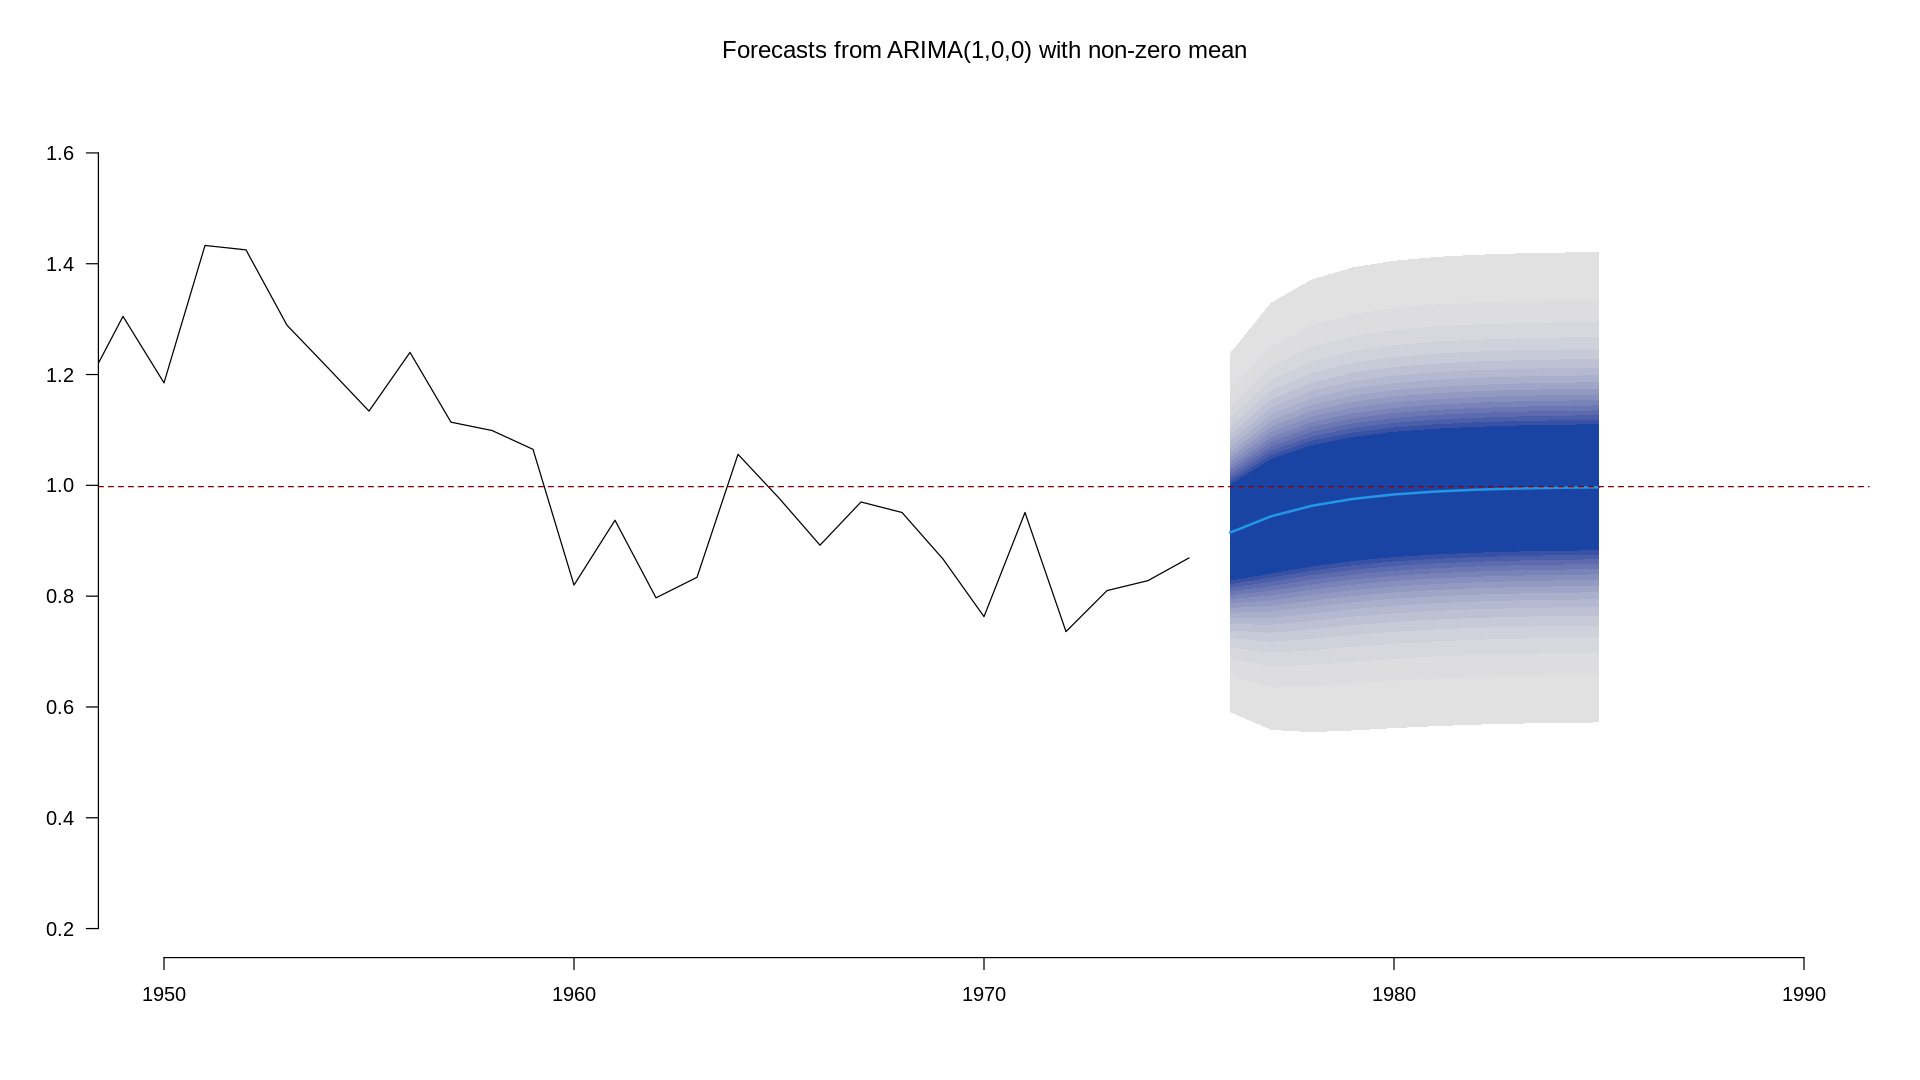

In [ ]:

par(bty = "n", las = 1, mfrow = c(1,1), font.main = 1)
plot(pred, xlim = c(1950, 1990))
abline(h = mean(Y), col = "darkred", lty = 2)


In [ ]:
pred <- forecast::forecast(model, h = 10, level = 0.95)
pred

     Point Forecast     Lo 95    Hi 95
1976      0.9146134 0.6683072 1.160920
1977      0.9441267 0.6507587 1.237495
1978      0.9632227 0.6522603 1.274185
1979      0.9755783 0.6575390 1.293618
1980      0.9835728 0.6626171 1.304529
1981      0.9887455 0.6665766 1.310914
1982      0.9920924 0.6694170 1.314768
1983      0.9942579 0.6713707 1.317145
1984      0.9956590 0.6726832 1.318635
1985      0.9965656 0.6735527 1.319579